**Breast Cancer Coimbra Data Set**

This dataset contains the clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls. There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer. The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.

Columns -
- **Age** : Patient's age in years .

- **BMI** : Body Mass Index of patients  (kg/m^2). The World Health Organization's (WHO) recommended healthy BMI range is 18.5 - 25 for both males and females.

- **Glucose** : Blood sugar level of patients (mg/dL). For adults, the glucose level ranges from 90–130 mg/dL (fasting), less than 180 mg/dL (1–2 hours after meals).

- **Insulin** : Insulin level of patients (µU/mL). Normal insulin fasting insulin levels are below 25 mIU/L (174 pmol/L) for women. The ideal insulin levels in men are probably below 8.4 mIU/ml.

- **HOMA**: HOMA-IR (Homeostatic Model Assessment of Insulin Resistance) tells you and your doctor how much insulin your pancreas needs to make to control your blood sugar levels. The normal levels of the Homa Index for adults may vary according to the patient's BMI, however, the normal values are generally: HOMA-IR: less than 2.5 HOMA-BETA: between 167 and 175.

- **Leptin** : Leptin is a hormone your adipose tissue (body fat) releases that helps your body maintain your normal weight on a long-term basis. It does this by regulating hunger by providing the sensation of satiety (feeling full). Adults assigned female at birth: 0.5 - 15.2 (ng/mL) and adults assigned male at birth: 0.5 - 12.5 ng/mL.

- **Adiponectin** : Adiponectin is a hormone and an adipokine protein that affects several metabolic processes and is mainly known for its insulin-sensitizing and anti-inflammatory effects. Normal adiponectin levels in humans range from 3 to 37 (ug/mL).

- **Resistin** : Resistin levels have been associated with several pathological disorders such as metabolic disorders, cancers etc. The mean resistin level was observed to be 24.2 ng/ml in the affected individuals. Whereas, the level was found to be much less in healthy individuals (10.1 ng/ml).

- **MCP-1** (pg/dL): Monocyte chemoattractant protein-1 (MCP-1/CCL2) is one of the key chemokines that regulate migration and infiltration of monocytes/macrophages.

- **Class**: one of (0, 1). 0=Healthy controls, 1=Patients.

In [ ]:
!pip install ehrapy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import warnings
import seaborn as sns
import ehrapy as ep
import anndata as ad

plt.style.use("ggplot")
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("dataR2.csv",
                   sep=",")

In [3]:
data = data.rename(columns={"Classification": "Class"})

In [4]:
data["Class"].replace((1, 2), (0, 1), inplace=True)

In [5]:
data["patient_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("patient_id", inplace=True)

In [7]:
data.to_csv("breast_cancer_coimbra_prepared.csv")

In [8]:
adata = ep.io.read_csv("breast_cancer_coimbra_prepared.csv", index_column="patient_id")
#adata.obs["mortality_cat"] = adata[:, "mortality"].X
#adata.obs["mortality_cat"] = adata.obs["mortality_cat"].astype(int).astype(str)
#adata.obs["icustay"] = adata.obs.index.astype(int)
adata

AnnData object with n_obs × n_vars = 116 × 10
    layers: 'original'

In [16]:
adata.to_df().head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Class
patient_id,,,,,,,,,,
1,48.0,23.500000,70.0,2.707,0.467409,8.807100,9.702400,7.99585,417.114014,0.0
2,83.0,20.690495,92.0,3.115,0.706897,8.843800,5.429285,4.06405,468.786011,0.0
3,82.0,23.124670,91.0,4.498,1.009651,17.939301,22.432039,9.27715,554.697021,0.0
4,68.0,21.367521,77.0,3.226,0.612725,9.882700,7.169560,12.76600,928.219971,0.0
5,86.0,21.111111,92.0,3.549,0.805386,6.699400,4.819240,10.57635,773.919983,0.0


In [20]:
ep.pp.qc_metrics(adata)
#ep.pl.qc_metrics(adata)

(            missing_values_abs  missing_values_pct
 patient_id                                        
 1                            0                 0.0
 2                            0                 0.0
 3                            0                 0.0
 4                            0                 0.0
 5                            0                 0.0
 ...                        ...                 ...
 112                          0                 0.0
 113                          0                 0.0
 114                          0                 0.0
 115                          0                 0.0
 116                          0                 0.0
 
 [116 rows x 2 columns],
              missing_values_abs  missing_values_pct        mean      median  \
 Age                           0                 0.0   57.301724   56.000000   
 BMI                           0                 0.0   27.582111   27.662416   
 Glucose                       0                 0.0   97

In [9]:
variables = [
    "Age",
    "Glucose",
    "Insulin",
    "HOMA",
    "Leptin",
    "Adiponectin",
    "Resistin",
    "MCP.1",
]
variables_mort = variables.copy()
variables_mort.append("Class")

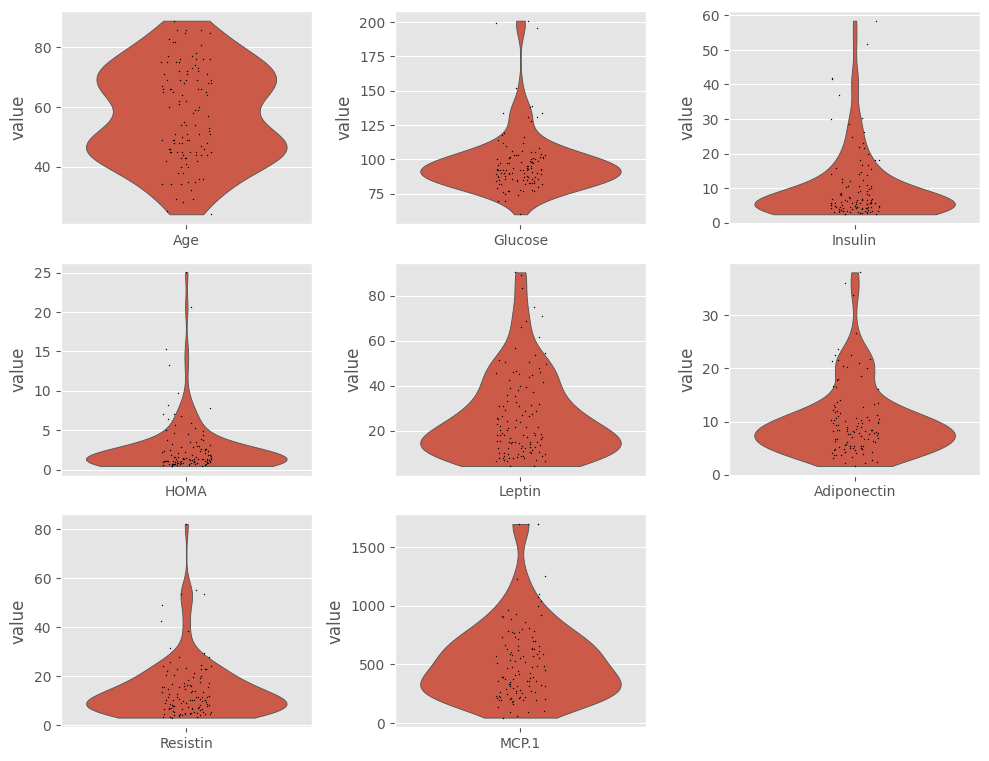

In [22]:
fig = plt.figure(figsize=(10, 10))
for i, variable in enumerate(variables, start=1):
    ax = plt.subplot(4, 3, i)
    ep.pl.violin(adata, keys=variable, ax=ax, show=False)
fig.tight_layout()
plt.show()

Exploring the data distributions and identifying patterns or anomalies within each variable.

- Overall Insights:
Density and Distribution: Violin plots give a clear picture of where most data points lie, making it easier to see the central tendency and variability.

- Outliers: The individual black dots identify outliers in each variable.

- Comparative Analysis: By comparing the shapes of the violin plots, how the distributions differ among the variables is understood. For example, a wider plot at a certain point indicates more individuals have values in that range.


In [ ]:
#Converting Ann data to pandas dataframe
df = ep.ad.anndata_to_df(adata)

**Univariate Analysis**

In [17]:
def numeric_feature_stats(numeric_feature):
  for col in numeric_feature:
    print('*'*5 , col , '*'*5)
    print(numeric_feature[col].agg(['min','max','mean','median','std','skew','kurtosis']))
    print()

In [20]:
numeric_feature_stats(df)

***** Age *****
min         24.000000
max         89.000000
mean        57.301723
median      56.000000
std         16.112766
skew         0.017832
kurtosis    -0.983042
Name: Age, dtype: float32

***** BMI *****
min         18.370001
max         38.578758
mean        27.582111
median      27.662416
std          5.020135
skew         0.170151
kurtosis    -0.922927
Name: BMI, dtype: float32

***** Glucose *****
min          60.000000
max         201.000000
mean         97.793106
median       92.000000
std          22.525162
skew          2.593304
kurtosis      8.987878
Name: Glucose, dtype: float32

***** Insulin *****
min          2.432000
max         58.459999
mean        10.012086
median       5.924500
std         10.067768
skew         2.577568
kurtosis     7.502049
Name: Insulin, dtype: float32

***** HOMA *****
min          0.467409
max         25.050343
mean         2.694988
median       1.380939
std          3.642043
skew         3.812087
kurtosis    17.590780
Name: HOMA, dtype:

**Bivariate Analysis**

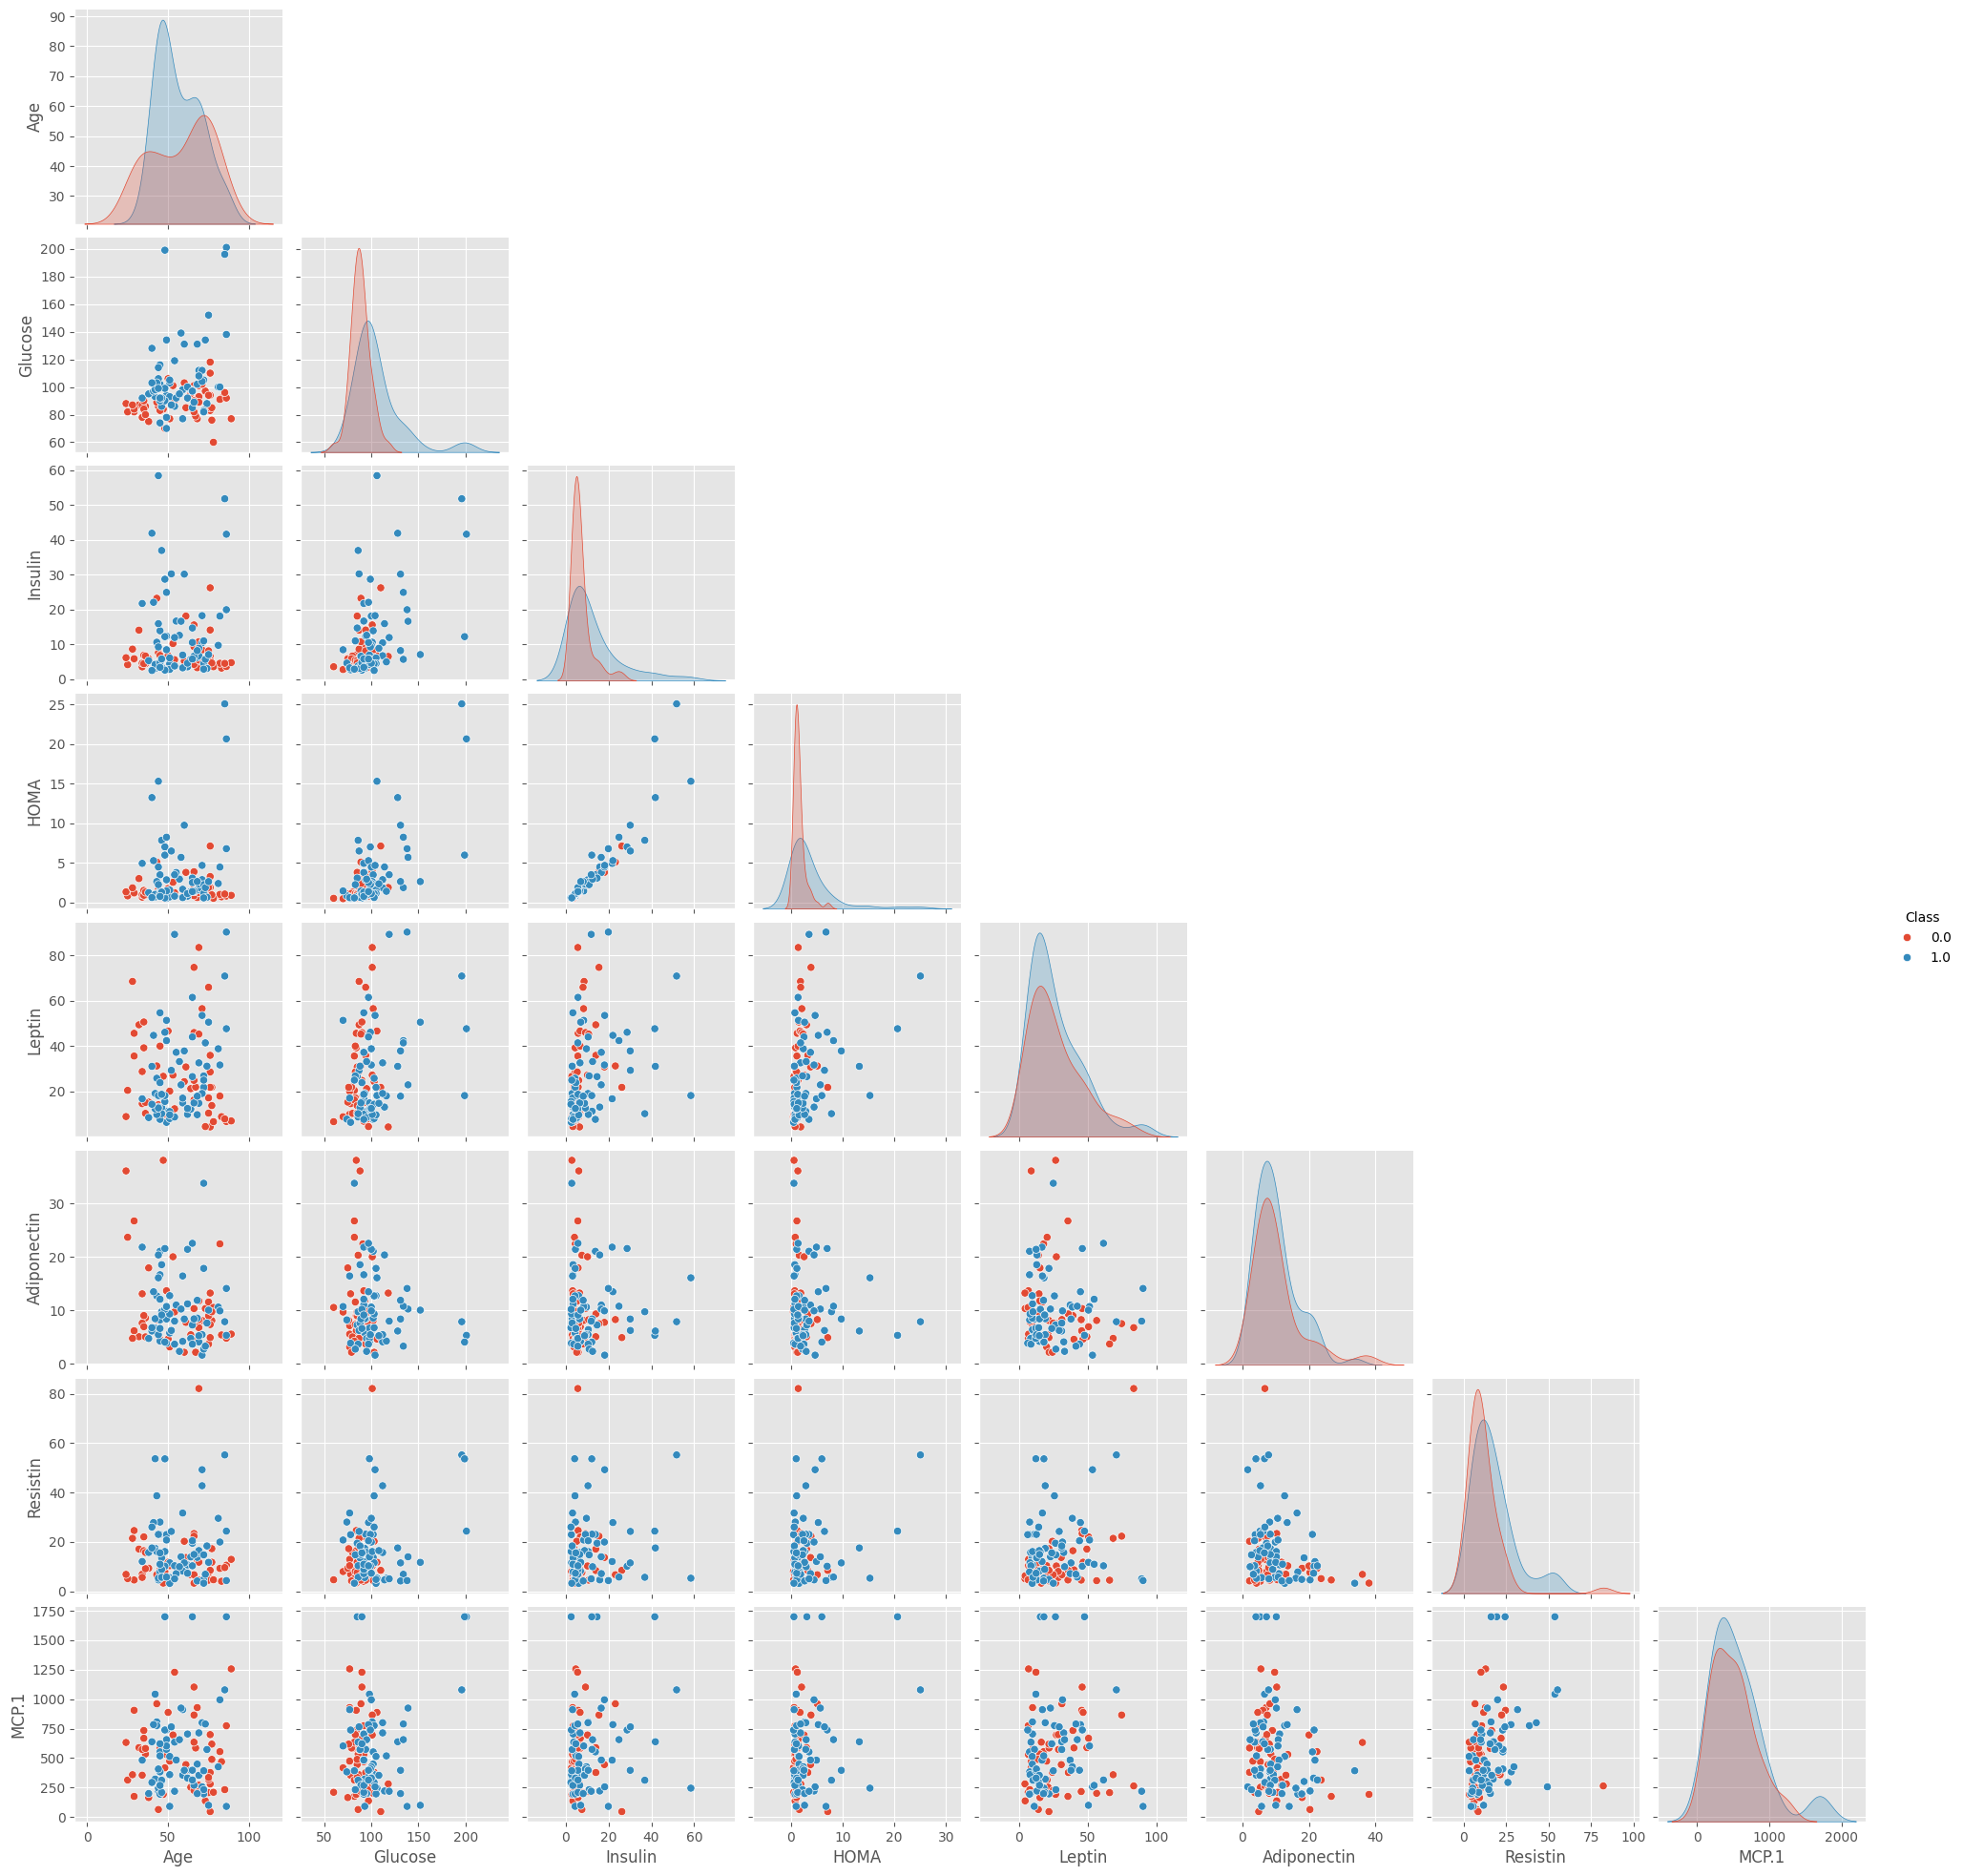

In [11]:
#sns.set(style="ticks")
g = sns.pairplot(
    df,
    vars=variables,
    hue="Class",
)

# hide the upper triangle
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

# change back to our preferred style
plt.style.use("ggplot")

Age:

The age distribution for both classes seems quite similar, with some overlap. This suggests that age alone might not be a strong distinguishing factor between the two classes.

Glucose:

Glucose levels for the class labeled as 1.0 are generally higher compared to those labeled as 0.0. This variable might be a good indicator for distinguishing between the two classes, with higher glucose levels indicating a greater likelihood of belonging to class 1.0.

Insulin:

Similar to glucose, insulin levels are generally higher for class 1.0 than for class 0.0. This suggests that higher insulin levels might be associated with class 1.0.

HOMA:

HOMA (Homeostatic Model Assessment) values for class 1.0 are typically higher than for class 0.0. This could indicate that individuals in class 1.0 have poorer insulin sensitivity and higher insulin resistance.

Leptin:

Leptin levels seem to be higher for class 1.0 compared to class 0.0. Leptin is involved in regulating energy balance, and higher levels might be associated with class 1.0.

Adiponectin:

Adiponectin levels are generally lower for class 1.0 compared to class 0.0. Adiponectin is involved in regulating glucose levels and fatty acid breakdown, and lower levels might be indicative of metabolic issues associated with class 1.0.

Resistin:

Resistin levels are higher in class 1.0 than in class 0.0. Resistin is believed to play a role in insulin resistance, and higher levels might be associated with class 1.0.

MCP.1:

MCP.1 (Monocyte Chemoattractant Protein-1) levels are higher for class 1.0 than for class 0.0. MCP.1 is involved in the immune response and inflammation, and higher levels might indicate a higher inflammatory state associated with class 1.0.

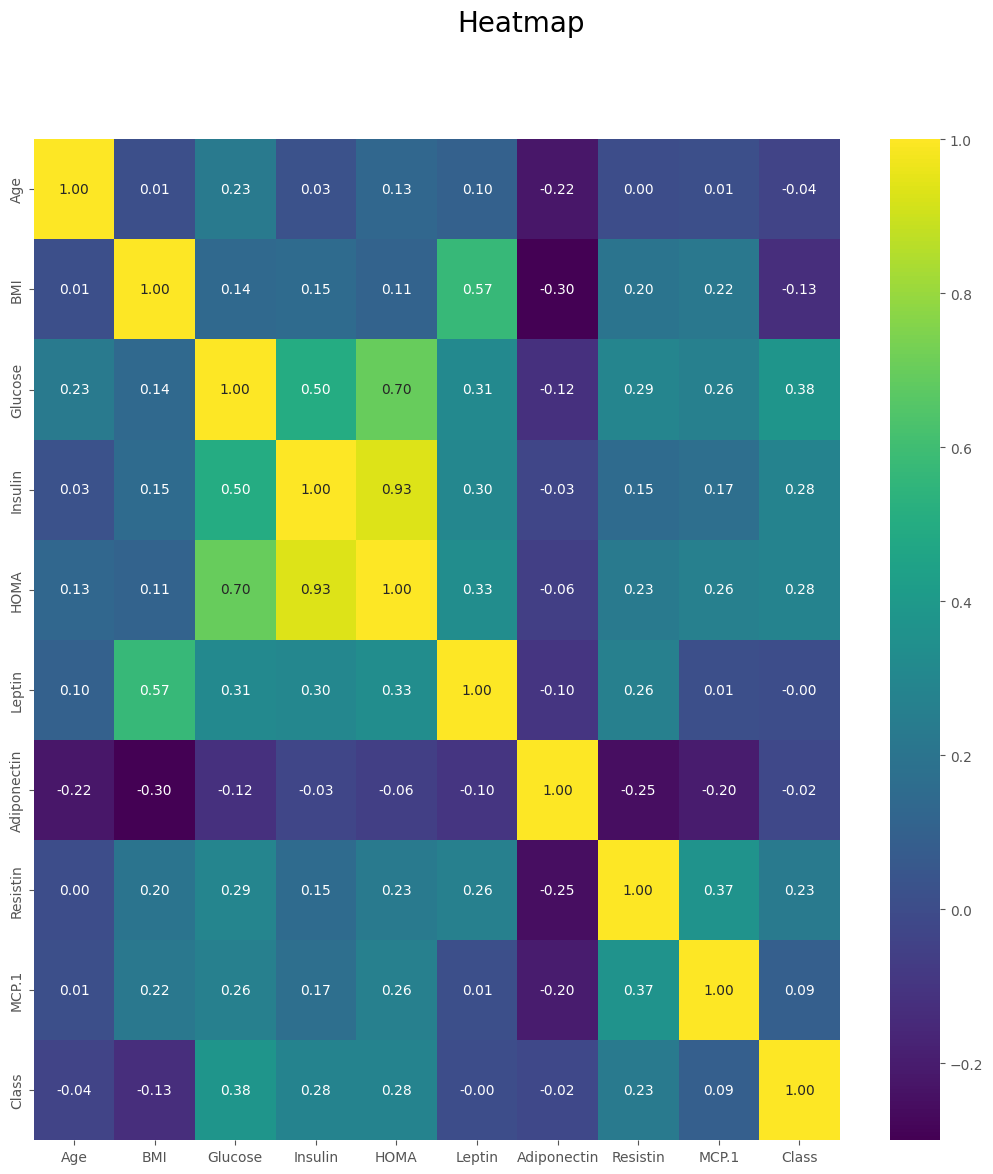

In [39]:
f,ax = plt.subplots(figsize=(13,13))
corr= df.corr()
hm=sns.heatmap(round(corr,2),annot=True,cmap='viridis',fmt='.2f')
t=f.suptitle('Heatmap',fontsize=20)

**Understanding the Heatmap**

Color Scale:

The color scale ranges from dark purple to bright yellow.

- Dark Purple: Indicates a strong negative correlation (-0.4).

- Bright Yellow: Indicates a strong positive correlation (1.0).

- Intermediate colors represent varying degrees of correlation strength and direction.

Correlation Coefficient:

- Positive Correlation (close to 1): Both variables tend to increase together.

- Negative Correlation (close to -1): One variable tends to increase as the other decreases.

- No Correlation (around 0): No linear relationship between the variables.

Key Observations:
- Age:
Adiponectin: Moderately negative correlation (-0.22), suggesting that as Age increases, Adiponectin levels tend to decrease.

- BMI:
Leptin: Moderately positive correlation (0.57), indicating that higher BMI is associated with higher Leptin levels.

- Glucose:
HOMA: Strong positive correlation (0.70), showing that as Glucose levels increase, HOMA values also tend to increase.

- Insulin:
HOMA: Very strong positive correlation (0.93), suggesting that higher Insulin levels are almost directly associated with higher HOMA values.

- Leptin:
Adiponectin: Moderately negative correlation (-0.30), indicating that higher Leptin levels are associated with lower Adiponectin levels.

- Resistin:
MCP.1: Moderately positive correlation (0.37), suggesting that higher Resistin levels are associated with higher MCP.1 levels.

Insights:
- Glucose and HOMA: The strong positive correlation (0.70) indicates a significant relationship, suggesting that higher glucose levels are linked to poorer insulin sensitivity.

- Insulin and HOMA: The very strong positive correlation (0.93) highlights the close relationship between insulin levels and insulin resistance.

- Leptin and BMI: The positive correlation (0.57) suggests that individuals with higher BMI tend to have higher Leptin levels, which is consistent with the role of Leptin in regulating energy balance and fat storage.

**Machine Learning Model**

In [ ]:
#Defining the X and y data
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [ ]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
     

In [ ]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
#Prediction on test data
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]]


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  1]
 [ 2 10]]


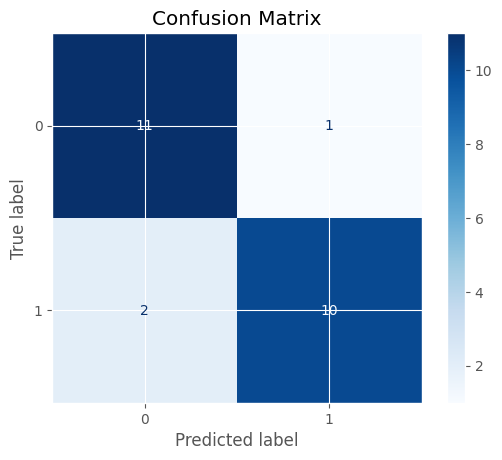

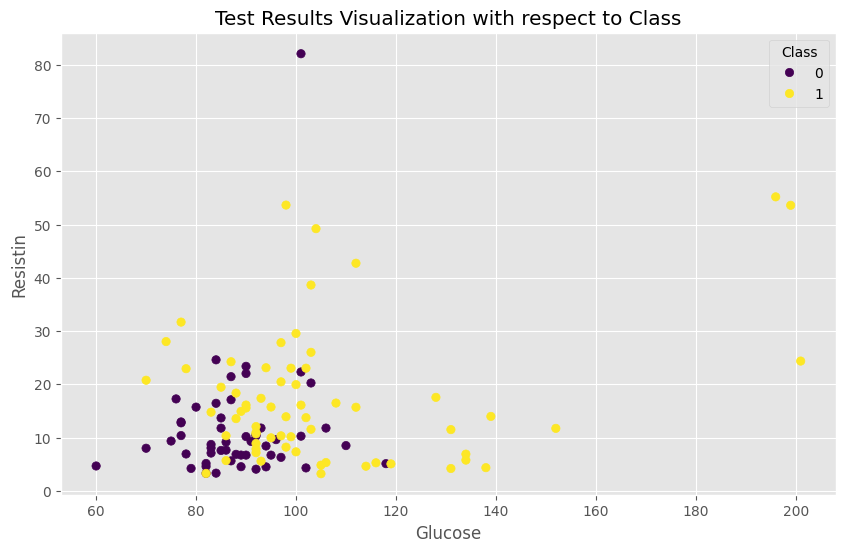

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Glucose'], df['Resistin'], c=df['Class'], cmap='viridis')
plt.title('Test Results Visualization with respect to Class')
plt.xlabel('Glucose')
plt.ylabel('Resistin')
plt.legend(*scatter.legend_elements(), title="Class")
plt.show()


Interpretation of the Confusion Matrix
- True Positives (TP):

Count: 10

Meaning: The model correctly predicted class 1 when the actual class was 1.

- True Negatives (TN):

Count: 11

Meaning: The model correctly predicted class 0 when the actual class was 0.

- False Positives (FP):

Count: 1

Meaning: The model incorrectly predicted class 1 when the actual class was 0 (Type I error).

- False Negatives (FN):

Count: 2

Meaning: The model incorrectly predicted class 0 when the actual class was 1 (Type II error).

Metrics Calculated from the Confusion Matrix
- Accuracy: The proportion of total predictions that were correct.

Accuracy =𝑇𝑃 + 𝑇𝑁𝑇𝑃 +𝑇𝑁 + 𝐹𝑃 + 𝐹𝑁 = 10 + 1110 + 11 + 1 + 2 = 2124 ≈ 85%

- Precision: The proportion of positive predictions that were correct.

Precision=𝑇𝑃𝑇𝑃 + 𝐹𝑃= 1010 + 1= 1011 ≈ 90.9%

- Recall (Sensitivity): The proportion of actual positives that were correctly predicted.

Recall= 𝑇𝑃𝑃 + 𝐹𝑁 = 1010 + 2 = 1012 ≈ 83.3%

- F1 Score: The harmonic mean of precision and recall, providing a balance between the two metrics.

F1 Score= 2 × Precision × RecallPrecision + Recall = 2 × 0.909 × 0.8330.909 + 0.833 ≈ 86.8%

Insights
- High Precision: Indicates that when the model predicts a positive class, it is correct most of the time.

- High Recall: Indicates that the model successfully identifies a high proportion of actual positives.

Balanced Accuracy: The model generally performs well in both classes.

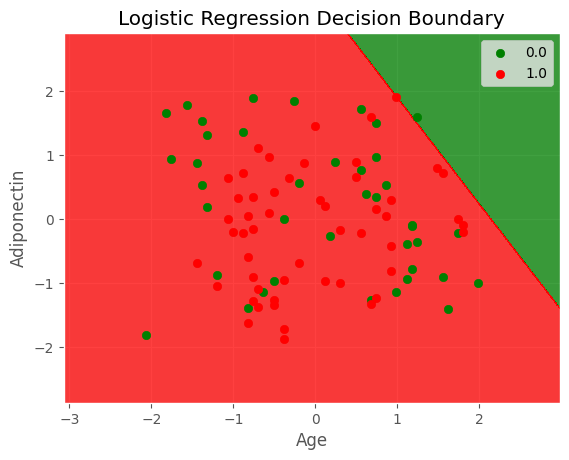

In [71]:
# Select features for visualization
X = df[['Age', 'Adiponectin']]
y = df['Class']


# Plotting the decision boundary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('green', 'red'))(i), label=j)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Adiponectin')
plt.legend()
plt.show()



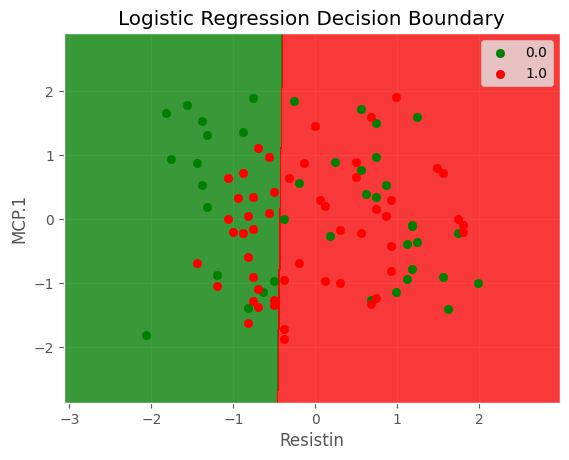

In [75]:
X = df[['Resistin', 'MCP.1']]
y = df['Class']


# Plotting the decision boundary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('green', 'red'))(i), label=j)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Resistin')
plt.ylabel('MCP.1')
plt.legend()
plt.show()

The plot and the decision boundary tell us that while the logistic regression model performs well overall, there are still areas for improvement, especially in reducing misclassifications. The decision boundary provides a clear visual representation of where the model's predictions might be incorrect.

**KNN Model**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred_knn = classifier.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]]


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
accuracy_score(y_test, y_pred_knn)

[[11  1]
 [ 3  9]]


**Decision Tree Model**

In [46]:
from sklearn.tree import DecisionTreeClassifier
# Train the Decision Tree model 
classifier_dt = DecisionTreeClassifier(random_state=0) 
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [63]:
y_pred_dt = classifier_dt.predict(X_test)
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]]


In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
accuracy_score(y_test, y_pred_dt)

[[10  2]
 [ 3  9]]


**Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model 
classifier_nb = GaussianNB() 
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred_nb = classifier_nb.predict(X_test)
print(np.concatenate((y_pred_nb.reshape(len(y_pred_nb),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]]


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)
accuracy_score(y_test, y_pred_nb)

[[11  1]
 [ 5  7]]


**SVM Model**

In [58]:
from sklearn.svm import SVC
# Train the SVC model 
classifier_svc = SVC(kernel='linear', random_state=0) 
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [59]:
y_pred_svc = classifier_svc.predict(X_test)
print(np.concatenate((y_pred_svc.reshape(len(y_pred_svc),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]]


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)
accuracy_score(y_test, y_pred_svc)

[[11  1]
 [ 4  8]]


**Conclusion**